In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
import arch
import yfinance as yf

#### 株式市場

In [17]:
stock_code = "^N225"
nikkei = yf.download(stock_code, start="1960-01-01", end="2023-05-31")
nikkei

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0
...,...,...,...,...,...,...
2023-05-10,29189.410156,29195.160156,29070.109375,29122.179688,29122.179688,87300000
2023-05-11,29110.789062,29165.589844,29028.710938,29126.720703,29126.720703,82200000
2023-05-12,29199.300781,29426.060547,29141.519531,29388.300781,29388.300781,106100000


In [18]:
nikkei['Adj Close']

Date
1965-01-05     1257.719971
1965-01-06     1263.989990
1965-01-07     1274.270020
1965-01-08     1286.430054
1965-01-12     1288.540039
                  ...     
2023-05-10    29122.179688
2023-05-11    29126.720703
2023-05-12    29388.300781
2023-05-15    29626.339844
2023-05-16    29842.990234
Name: Adj Close, Length: 14351, dtype: float64

Text(0.5, 1.0, 'Nikkei 225 Index')

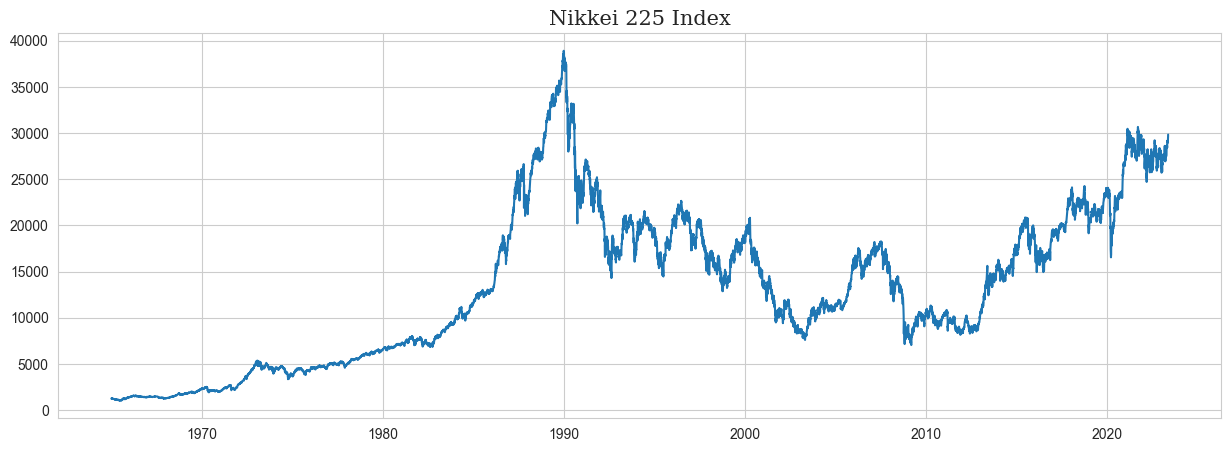

In [19]:
plt.figure(figsize = (15,5))
plt.plot(nikkei['Adj Close'])
plt.title('Nikkei 225 Index', fontfamily = 'Serif', fontsize = 15)

In [20]:
stock_code = "^N225"
nikkei5 = yf.download(stock_code, start="2019-01-01", end="2023-05-31")
nikkei5

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-04,19655.130859,19692.580078,19241.369141,19561.960938,19561.960938,91600000
2019-01-07,19944.609375,20266.220703,19920.800781,20038.970703,20038.970703,81500000
2019-01-08,20224.669922,20347.919922,20106.359375,20204.039062,20204.039062,86400000
2019-01-09,20366.300781,20494.349609,20331.199219,20427.060547,20427.060547,72800000
2019-01-10,20270.880859,20345.919922,20101.929688,20163.800781,20163.800781,73700000
...,...,...,...,...,...,...
2023-05-10,29189.410156,29195.160156,29070.109375,29122.179688,29122.179688,87300000
2023-05-11,29110.789062,29165.589844,29028.710938,29126.720703,29126.720703,82200000
2023-05-12,29199.300781,29426.060547,29141.519531,29388.300781,29388.300781,106100000


Text(0.5, 1.0, 'Nikkei 225 Index')

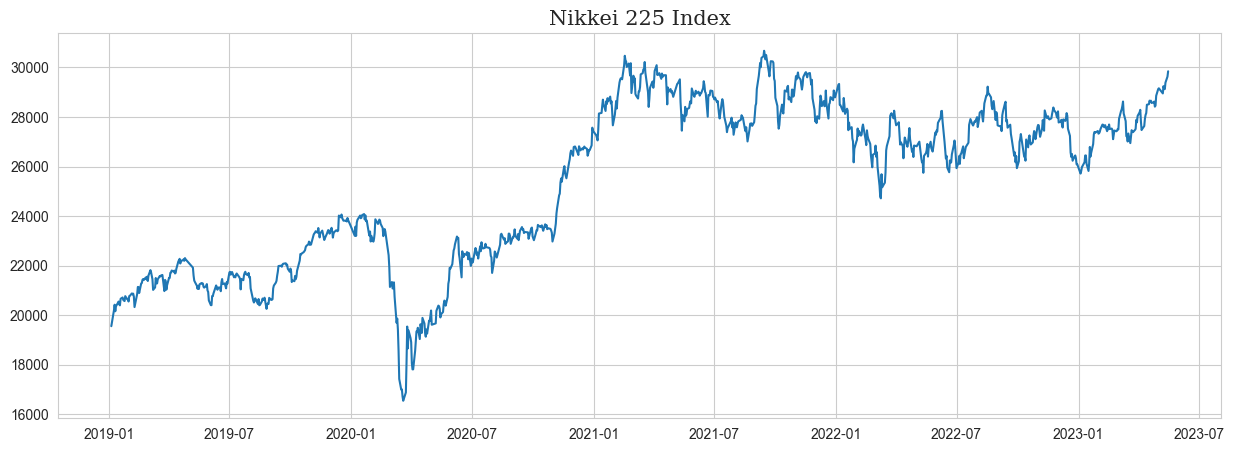

In [21]:
plt.figure(figsize = (15,5))
plt.plot(nikkei5['Adj Close'])
plt.title('Nikkei 225 Index', fontfamily = 'Serif', fontsize = 15)

#### 実質GDP増加率

In [30]:
gdp = pd.read_csv('./Data/GDPrate.csv', index_col = 2)
gdp = gdp.Value.astype(float)

In [38]:
gdp.index = pd.date_range(start = '1980-04-01', end = '2022-12-31', freq = 'Q')
gdp

1980-06-30   -0.5
1980-09-30    2.2
1980-12-31    2.1
1981-03-31    0.6
1981-06-30    1.2
             ... 
2021-12-31    1.1
2022-03-31   -0.5
2022-06-30    1.2
2022-09-30   -0.3
2022-12-31    0.0
Freq: Q-DEC, Name: Value, Length: 171, dtype: float64

Text(0.5, 1.0, 'real GDP rate')

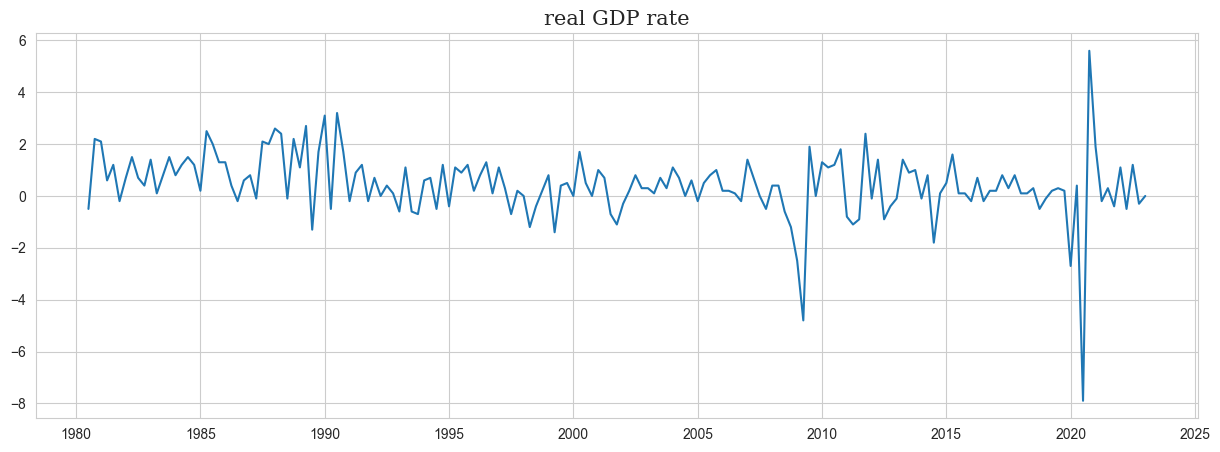

In [40]:
plt.figure(figsize = (15,5))
plt.plot(gdp)
plt.title('real GDP rate', fontfamily = 'Serif', fontsize = 15)

Text(0.5, 1.0, 'real GDP index')

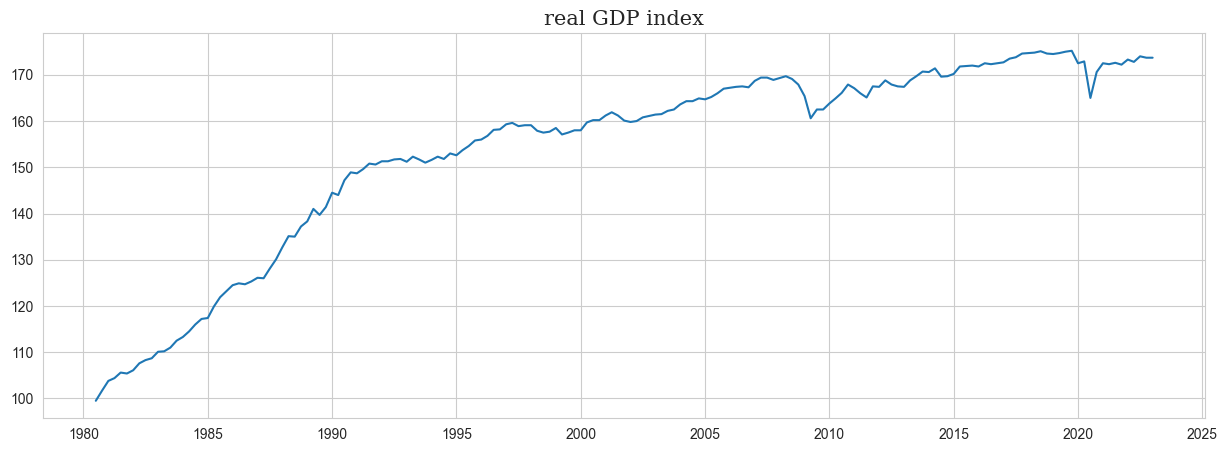

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(gdp.cumsum() + 100)
plt.title('real GDP index', fontfamily='Serif', fontsize=15)

#### 失業率

In [49]:
unemploy = pd.read_csv('./Data/unemployment.csv', index_col = 2)
unemploy = unemploy.Value.astype(float) * 0.01
unemploy.index = pd.date_range(start = '1953-01-01', end = '2023-03-31', freq = 'M')

In [50]:
unemploy

1953-01-31    0.019
1953-02-28    0.019
1953-03-31    0.018
1953-04-30    0.020
1953-05-31    0.020
              ...  
2022-11-30    0.025
2022-12-31    0.025
2023-01-31    0.024
2023-02-28    0.026
2023-03-31    0.028
Freq: M, Name: Value, Length: 843, dtype: float64

Text(0.5, 1.0, 'Unemployment Rate')

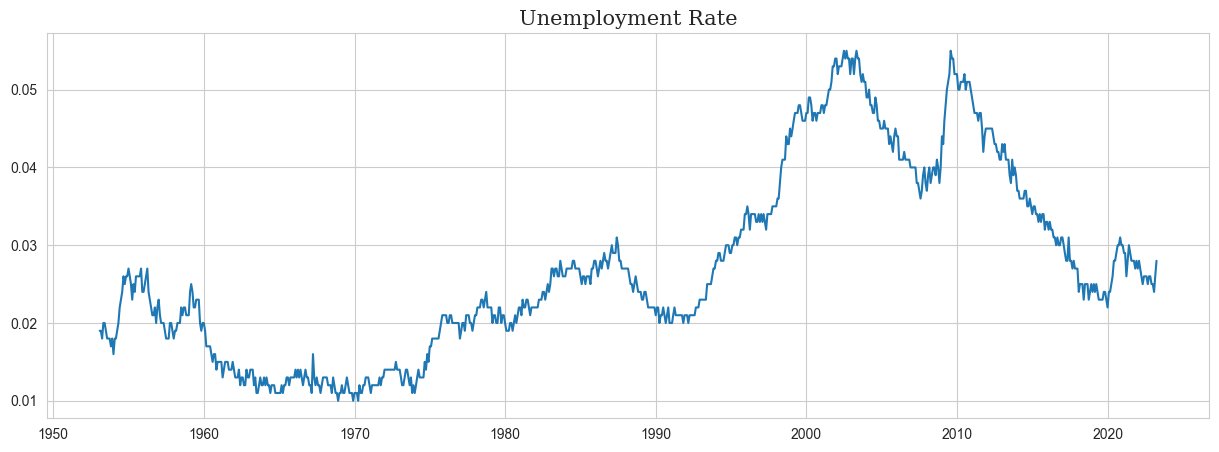

In [51]:
plt.figure(figsize=(15, 5))
plt.plot(unemploy)
plt.title('Unemployment Rate', fontfamily='Serif', fontsize=15)

#### 金利

In [58]:
interest = pd.read_csv('./Data/interest.csv', index_col = 2)
interest = interest.Value.astype(float) * 0.01

In [59]:
interest.index = pd.to_datetime(interest.index)

In [60]:
interest

DateTime
1972-10-02    0.0425
1972-11-03    0.0425
1972-12-01    0.0425
1973-01-05    0.0425
1973-02-02    0.0425
               ...  
2022-12-20   -0.0010
2023-01-18   -0.0010
2023-02-28   -0.0010
2023-03-10   -0.0010
2023-04-28   -0.0010
Name: Value, Length: 655, dtype: float64

Text(0.5, 1.0, 'Unemployment Rate')

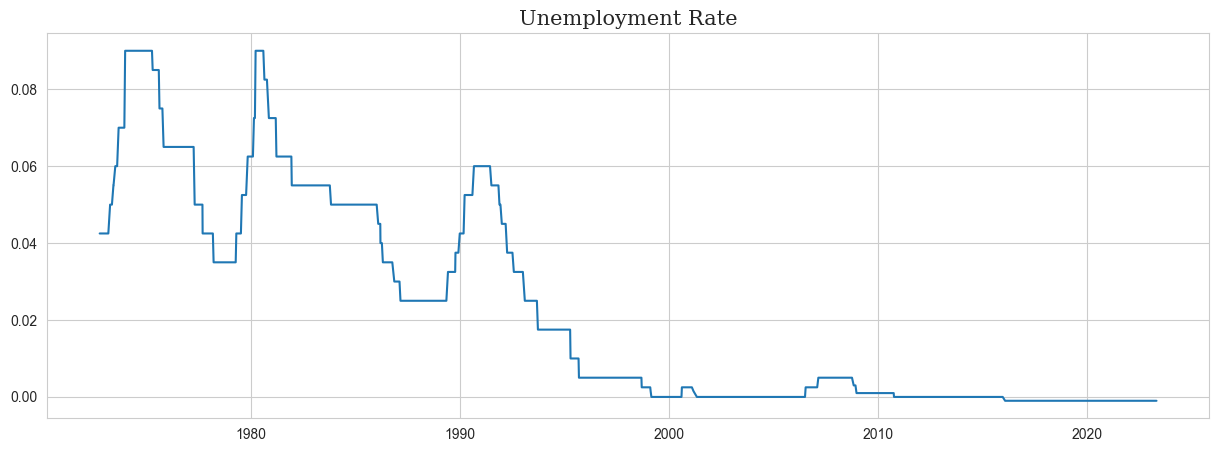

In [61]:
plt.figure(figsize=(15, 5))
plt.plot(interest)
plt.title('Unemployment Rate', fontfamily='Serif', fontsize=15)

### 時系列分析
まず、株式市場の分析する。

In [66]:
nikkei_ret = np.log(nikkei['Adj Close']) - np.log(nikkei['Adj Close'].shift(1))
nikkei_ret = nikkei_ret.dropna()
nikkei_ret

Date
1965-01-06    0.004973
1965-01-07    0.008100
1965-01-08    0.009498
1965-01-12    0.001639
1965-01-13   -0.005346
                ...   
2023-05-10   -0.004134
2023-05-11    0.000156
2023-05-12    0.008941
2023-05-15    0.008067
2023-05-16    0.007286
Name: Adj Close, Length: 14350, dtype: float64

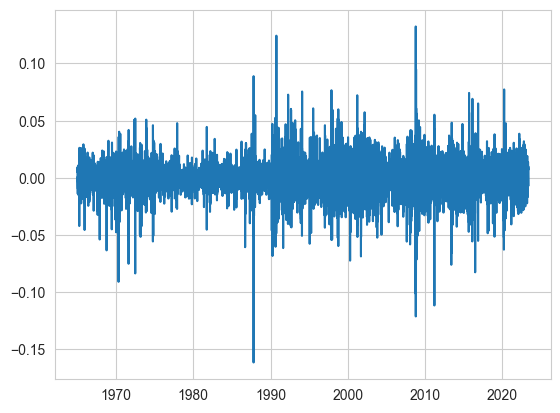

In [67]:
plt.plot(nikkei_ret)

<Figure size 1000x800 with 0 Axes>

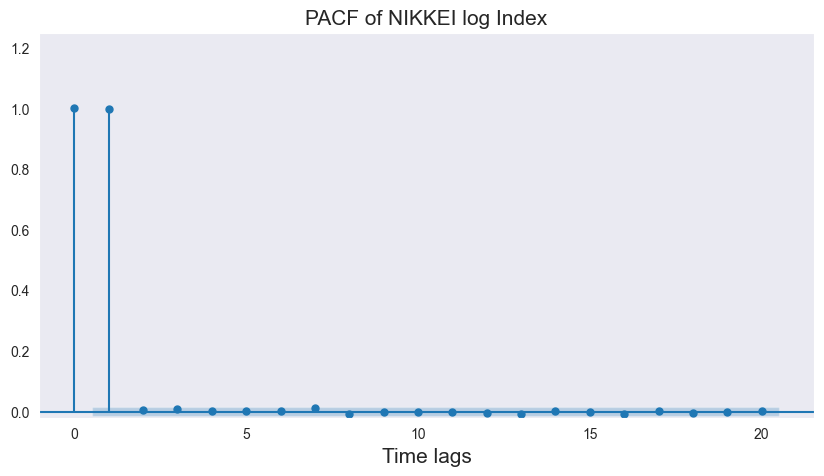

In [84]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(nikkei['Adj Close']), auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of NIKKEI log Index', fontsize = 15)
plt.show()

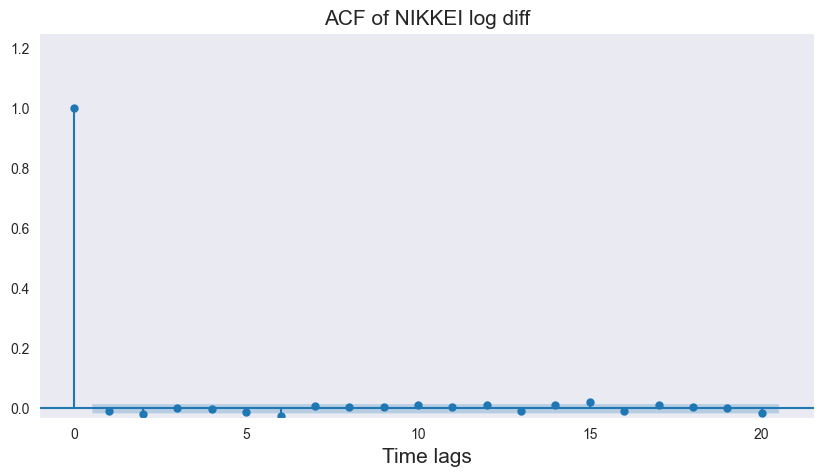

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(nikkei_ret, auto_ylims = True, lags = 20, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('ACF of NIKKEI log diff', fontsize = 15)
plt.show()

In [88]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(nikkei['Adj Close'], order = (1,0,2), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/Desktop/Pycharm/JapaneseIssue/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                14351
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -96528.824
Date:                Wed, 17 May 2023   AIC                         193067.648
Time:                        01:01:00   BIC                         193105.506
Sample:                             0   HQIC                        193080.236
                              - 14351                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.432e+04      0.187   7.64e+04      0.000    1.43e+04    1.43e+04
ar.L1          0.9998      0.000   5414.099      0.000       0.999       1.000
ma.L1         -0.0019      0.003     -0.563      0.574      -0.009       0.005
ma.L2         -0.0336      0.004     -7.528      0.000      -0.042      -0.025
sigma2      4.071e+04    153.915    264.471      0.000    4.04e+04     4.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            210681.61
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              33.97   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.34e+18. Standard errors may be unstable.
"""

In [68]:
decomposition = sm.tsa.seasonal_decompose(unemploy, model = 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid